### Data Preparation and Merging

1. This section involves loading the data from multiple CSV files, each representing different melatonin products with varying doses.
2. We will merge these files into a single DataFrame to streamline our analysis.
3. Each file's dose information, which is crucial for our analysis, will be manually specified and added to the DataFrame..


In [1]:
import pandas as pd

In [2]:
# List of file paths and corresponding doses
files_and_doses = [
    ("B07N46LTJJ_ZzzQuilPureZzzsMelatoninSleepAidGummies-2mg.csv", "2mg"),  # Manually specifying dose
    ("B07PF1SN5B_vitafusionMaxStrengthMelatoninGummySupplements-10mg.csv", "10mg"),
    ("B08CGYFB2Q_VitamaticMelatonin20mgTablets.csv", "20mg"),
    ("B079TD7HG2_NatrolMelatoninSleepAidGummy-10mg.csv", "10mg"),
    ("B08451719W_CarlyleMelatonin12mgFastDissolve300Tablets.csv", "12mg")
]

In [3]:
# Load all files into dataframes, assign doses, and select only necessary columns
dataframes = []
for filepath, dose in files_and_doses:
    df = pd.read_csv(filepath)
    df['dose'] = dose  # Add dose information
    # Select only the necessary columns to simplify the dataset
    df = df[['product_title', 'review_rating', 'review_text', 'review_header', 'dose']]
    dataframes.append(df)

In [4]:
# Concatenate all dataframes into one
combined_data_cleaned = pd.concat(dataframes, ignore_index=True)

### Displaying Combined Data

1. After merging the data, it's essential to check the first few entries of our combined DataFrame. 
2. This helps verify that the data has been loaded and merged correctly, ensuring that all necessary columns are retained and correctly formatted.

In [5]:
# Display the first few rows of the cleaned and combined dataframe
combined_data_cleaned.head()

,product_title,review_rating,review_text,review_header,dose
0,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",2,I managed to force down a couple of gummies an...,Bad taste,2mg
1,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",3,I’ve heard so many good things about this prod...,"Works for my sister, but not for me. Plus it c...",2mg
2,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",1,"The first ingredients are ""Corn syrup, water a...",Sickeningly sweet - loaded with sugar,2mg
3,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",5,Product works! End up getting sleepy like boo ...,Actually works!,2mg
4,"ZzzQuil Pure Zzzs Melatonin Sleep Aid Gummies,...",5,You go to sleep very quickly!,Works great,2mg


***Successfully loaded and merged the data from five different melatonin product review files.***

**The essential columns retained are:**

1. Product Title: Identifies the product.
2. Review Rating: Numerical rating given by the reviewer.
3. Review Text: Text of the review.
4. Review Header: Summary or title of the review.
5. Dose: Melatonin dosage of the product, which has been added manually where necessary.

### Sentiment Analysis

We will perform sentiment analysis in two parts:
1. **Rating-based Sentiment Categorization**: Classify each review into Positive, Neutral, or Negative based on the review ratings.
2. **TextBlob Analysis**: Utilize TextBlob to derive sentiment from the review texts, providing a deeper insight into the customers' perceptions and feelings about the produts.


In [6]:
# Categorizing review ratings into sentiments: Positive (4-5), Neutral (3), Negative (1-2)
combined_data_cleaned['sentiment_rating_based'] = combined_data_cleaned['review_rating'].apply(lambda x: 'Positive' if x > 3 else ('Neutral' if x == 3 else 'Negative'))

### Visualization of Sentiment Distribution

Visualizing the distribution of sentiments gives us an immediate understanding of the general sentiment trends within our data. This helps identify whether positive, neutral, or negative sentiments dominate in the customer reviews.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

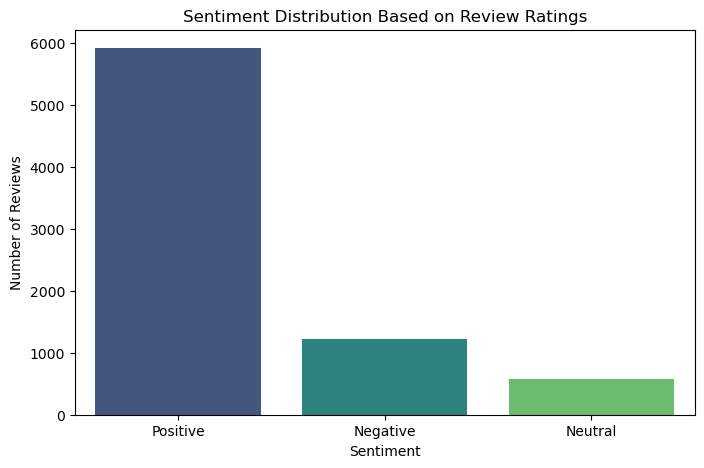

(None,
 sentiment_rating_based
 Positive    5914
 Negative    1226
 Neutral      570
 Name: count, dtype: int64)

In [8]:
# Display the distribution of sentiments based on ratings
sentiment_distribution = combined_data_cleaned['sentiment_rating_based'].value_counts()

# Plotting the sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='viridis')
plt.title('Sentiment Distribution Based on Review Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show(), sentiment_distribution

***Sentiment Categorization Based on Review Ratings***

**The bar chart displays the distribution of sentiments categorized based on review ratings:**

1. Positive Reviews: 5914
2. Negative Reviews: 1226
3. Neutral Reviews: 570
4. This visualization indicates a predominance of positive sentiments among the reviews, with fewer neutral and negative reviews.

In [9]:
#%pip install textblob

In [10]:
from textblob import TextBlob

# Function to calculate polarity and subjectivity using TextBlob
def analyze_sentiment_textblob(text):
    return TextBlob(text).sentiment.polarity

# Combine review header and text for a more comprehensive analysis
combined_data_cleaned['full_text'] = combined_data_cleaned['review_header'] + " " + combined_data_cleaned['review_text']

# Convert all text data to string and handle missing values
combined_data_cleaned['full_text'] = combined_data_cleaned['full_text'].astype(str).fillna('')

# Apply sentiment analysis on the combined text
combined_data_cleaned['polarity'] = combined_data_cleaned['full_text'].apply(analyze_sentiment_textblob)

# Categorize polarity into sentiments
combined_data_cleaned['sentiment_textblob'] = combined_data_cleaned['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x == 0 else 'Negative'))

# Display the first few rows with new sentiment data
combined_data_cleaned[['full_text', 'polarity', 'sentiment_textblob']].head()

,full_text,polarity,sentiment_textblob
0,Bad taste I managed to force down a couple of ...,-0.218519,Negative
1,"Works for my sister, but not for me. Plus it c...",0.191667,Positive
2,Sickeningly sweet - loaded with sugar The firs...,0.308929,Positive
3,Actually works! Product works! End up getting ...,0.412500,Positive
4,Works great You go to sleep very quickly!,0.670833,Positive


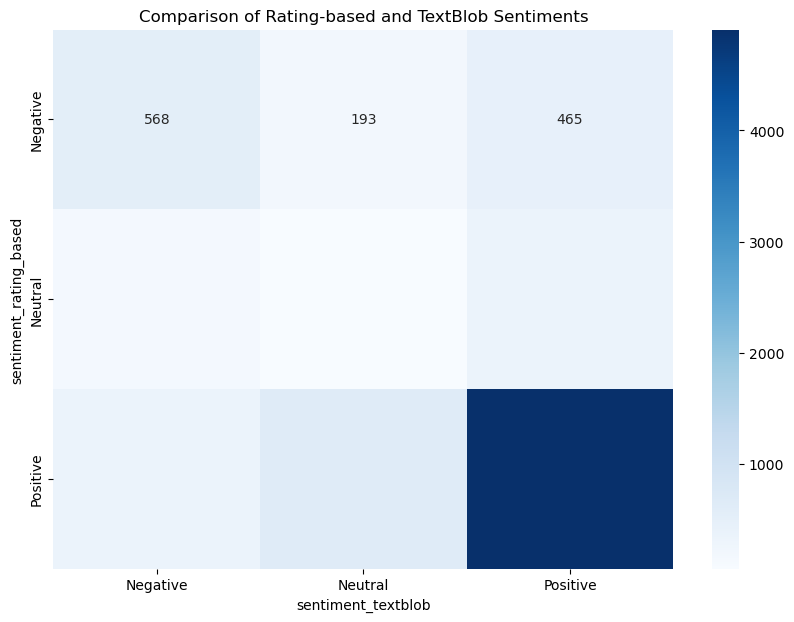

In [11]:
# Create a function to plot the comparison of sentiment analysis methods
def plot_sentiment_comparison(df, method1, method2, title):
    # Cross-tabulate data
    crosstab_data = pd.crosstab(df[method1], df[method2])
    
    # Create a heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(crosstab_data, annot=True, fmt="d", cmap='Blues', cbar=True)
    plt.title(title)
    plt.xlabel(method2)
    plt.ylabel(method1)
    plt.show()

# Plotting the comparison between rating-based and TextBlob sentiment analysis
plot_sentiment_comparison(combined_data_cleaned, 'sentiment_rating_based', 'sentiment_textblob', 'Comparison of Rating-based and TextBlob Sentiments')

### Text Analysis Using TF-IDF
1. 
To further analyze the text data, we apply the Term Frequency-Inverse Document Frequency (TF-IDF) method to identify and score the most relevant words within the review
2. . This analysis helps highlight key terms that are most influential in the reviews, providing insights into what customers focus on the mos.
.

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

In [13]:
# Ensuring stopwords are loaded
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mutar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# Define and remove stopwords
stop_words = set(stopwords.words('english'))  # use a set for faster operations

In [15]:
# Function to preprocess and clean text data
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [16]:
# Apply preprocessing to the full text
combined_data_cleaned['clean_text'] = combined_data_cleaned['full_text'].apply(preprocess_text)

In [17]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # limit to top 1000 terms
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_data_cleaned['clean_text'])

In [18]:
# Get feature names and corresponding scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1
tfidf_df = pd.DataFrame({'term': feature_names, 'score': tfidf_scores}).sort_values(by='score', ascending=False)

In [19]:
# Display the top 20 terms with the highest TF-IDF scores
tfidf_df.head(20)

,term,score
766,sleep,517.452941
367,great,483.979960
363,good,413.151401
979,works,412.122930
976,work,353.482045
852,taste,326.464883
662,product,320.681678
524,melatonin,229.609698
74,asleep,228.038362
479,like,225.535601


***Key Terms Analysis Using TF-IDF***

**We successfully computed the TF-IDF scores for the cleaned text data, identifying the most relevant terms in the reviews. Here are the top 20 key terms along with their scores:**

1. Sleep: The most frequently discussed topic, likely a primary concern for users.
2. Great, Good, Works, Work: These terms suggest positive outcomes and satisfaction with the products.
3. Taste: A significant factor for products that are ingested, like gummies.
4. Product, Melatonin: Central themes in the dataset, indicating discussions about the product itself and its active ingredient.
5. Asleep, Night: Directly related to the effectiveness of melatonin in aiding sleep.
6. Like, Well, Love: Reflect overall positive sentiment in the reviews.
7. Take, Gummies, Help, Helps: Usage and effectiveness seem to be common points of discussion.
8. Flavor: Important for the acceptability of edible products.
9. Get, Really: Often used to emphasize other terms or aspects of the product experience.

## Visualization of Key Terms
1. We'll create a word cloud to visualize the most frequently mentioned terms in the reviews, which will help us understand the prominent themes visually.

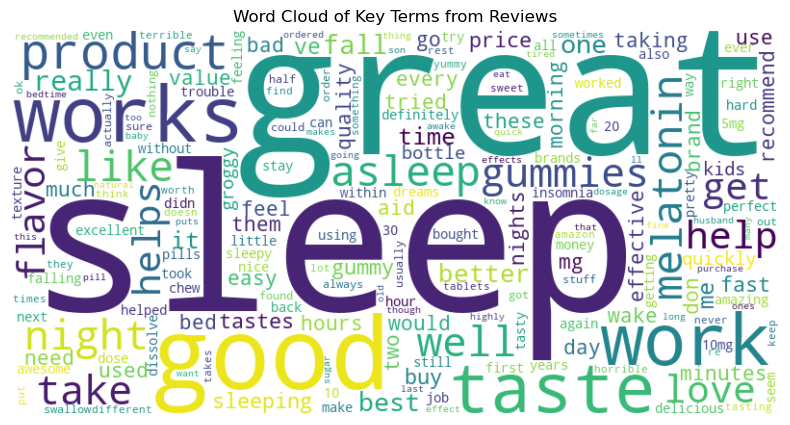

In [20]:
from wordcloud import WordCloud

# Generate a word cloud image for the most frequent terms from TF-IDF analysis
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(zip(tfidf_df['term'], tfidf_df['score'])))

# Display the generated word cloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Do not show axes to keep it clean
plt.title('Word Cloud of Key Terms from Reviews')
plt.show()

In [ ]:
Sentiment Analysis for Each Dose:
Group reviews by dose and perform sentiment analysis
dose_sentiment = combined_data_cleaned.groupby('dose')['sentiment_textblob'].value_counts(normalize=True).unstack()

Plot the sentiment distribution for each dose
plt.figure(figsize=(10, 6))
dose_sentiment.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Dose')
plt.xlabel('Dose')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.show()